In [1]:
import geopandas as gpd
from karstification import calc_karstification_for_HU12



/tmp/ipykernel_770803/2200125031.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
-77.9144
#from shapely import box
# NWA
#xmin = -94.456
#xmax = -94.335
#ymin = 36.104
#ymax = 36.174

# E of St. Louis
xmin = -90.243
xmax = -90.1286
ymin = 38.1928
ymax = 38.3325
#bbox = box(xmin,ymin,xmax,ymax)
bbox = (xmin,ymin,xmax,ymax)


In [2]:
from pynhd import pynhd

hr = pynhd.NHDPlusHR('huc12')
huc12 = pynhd.WaterData('wbd12', crs='epsg:4326')
box_hucs12 = huc12.bybox(bbox)
box_hucs12.plot()

NameError: name 'bbox' is not defined

In [7]:
test_huc = huc12.byid('huc12', ['060101050802'])#'070600010601''060101050802'])
test_huc.bounds

,minx,miny,maxx,maxy
0,-82.555582,35.790872,-82.408782,35.909447


In [8]:
import py3dep

this_huc = test_huc.iloc[0].geometry

#this_huc
py3dep.check_3dep_availability(this_huc.bounds) 



{'1m': True,
 '3m': True,
 '5m': False,
 '10m': True,
 '30m': True,
 '60m': False,
 'topobathy': False}

In [11]:
#py3dep.check_3dep_availability(this_huc.bounds) qless 
dem = py3dep.get_map("DEM", test_huc.iloc[0].geometry, resolution=10)


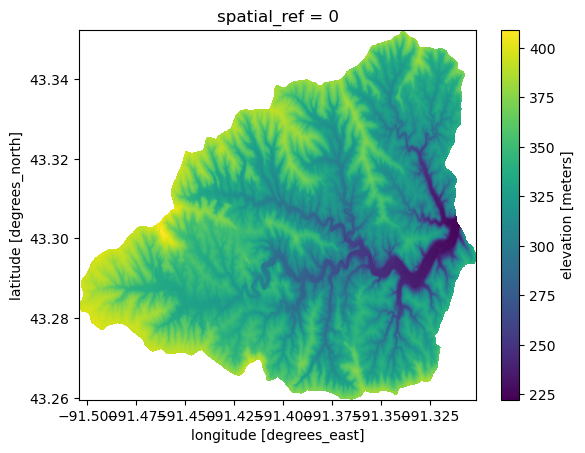

In [38]:
dem.plot()

In [37]:
dem = py3dep.get_dem(test_huc.iloc[0].geometry, 5)


In [4]:
import os
os.path.join('test','','blank')

'test/blank'

In [5]:
boxname = 'East of St. Louis #2, IL'
for hu_idx in box_hucs12.index:
    hu = box_hucs12.iloc[hu_idx]
    #huc10 = hu.huc10
    #dem = py3dep.get_map("DEM", box_hucs.loc[box_hucs.index[0]].geometry, resolution=30, geo_crs="epsg:4326", crs="epsg:3857")
    #dem.rio.to_raster("NHD-data/"+huc10+'.tif')
    huc_num = hu.huc12 # hu.uri.split('/')[-1]
    hu.crs = 'EPSG:4326'
    p_karst = calc_karstification_for_HU12(hu, boxname=boxname)

    print('HU', huc_num, 'has', str(p_karst)[:5], 'percent internal karst drainage.')

./whitebox_tools --run="FillSingleCellPits" --dem='/home/mcoving/github/sinkhole_analysis/qgis/East_of_St._Louis_2_IL/071402040607/071402040607.tif' --output='/home/mcoving/github/sinkhole_analysis/qgis/East_of_St._Louis_2_IL/071402040607/071402040607-pitfill.tif' -v --compress_rasters=False

*********************************
* Welcome to FillSingleCellPits *
* Powered by WhiteboxTools      *
* www.whiteboxgeo.com           *
*********************************
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%


In [7]:
hu

geometry                    MULTIPOLYGON (((-94.3148755990367 36.129118744...
objectid                                                                15068
tnmid                                  {C52C7ED5-24C9-41C8-91D7-E3CCF9BF8E52}
metasourceid                           {DB2246FE-D96C-44A3-8C38-0539394FEC62}
sourcedatadesc                                                           None
sourceoriginator                                                         None
sourcefeatureid                                                          None
loaddate                                                 2017-09-28T10:21:34Z
gnis_id                                                                  None
areaacres                                                            20349.89
areasqkm                                                                82.35
states                                                                     AR
huc12                                                           

In [11]:
from pynhd import pynhd

hr = pynhd.NHDPlusHR('huc12')
huc12 = pynhd.WaterData('wbd12', crs='epsg:4326')
box_hucs12 = huc12.bybox(bbox)
box_hucs12

,geometry,objectid,tnmid,metasourceid,sourcedatadesc,sourceoriginator,sourcefeatureid,loaddate,gnis_id,areaacres,areasqkm,states,huc12,name,hutype,humod,tohuc,noncontributingareaacres,noncontributingareasqkm,globalid
0,"MULTIPOLYGON (((-94.31488 36.12912, -94.31503 ...",15068,{C52C7ED5-24C9-41C8-91D7-E3CCF9BF8E52},{DB2246FE-D96C-44A3-8C38-0539394FEC62},None,None,None,2017-09-28T10:21:34Z,None,20349.89,82.35,AR,111101030403,Lake Weddington-Illinois River,S,NM,111101030601,0,0,{8DD313AB-E29C-11E2-8094-0021280458E6}
1,"MULTIPOLYGON (((-94.17372 36.16376, -94.17382 ...",15072,{4017D4D9-B380-4AE6-B045-F1F96D243E36},{DB2246FE-D96C-44A3-8C38-0539394FEC62},None,None,None,2017-09-28T10:21:51Z,None,14506.07,58.70,AR,111101030204,Little Wildcat Creek-Clear Creek,S,NM,111101030403,0,0,{8DD37DF5-E29C-11E2-8094-0021280458E6}
2,"MULTIPOLYGON (((-94.29305 36.23491, -94.29312 ...",15077,{1AAEE924-3E41-44EB-AD69-DA176AE17350},{DB2246FE-D96C-44A3-8C38-0539394FEC62},None,None,None,2017-09-28T10:21:51Z,None,33743.09,136.55,AR,111101030305,Outlet Osage Creek,S,NM,111101030403,0,0,{8DD3FF1F-E29C-11E2-8094-0021280458E6}
3,"MULTIPOLYGON (((-94.42806 36.24145, -94.42806 ...",15082,{EE10FDD6-07AE-43B6-A95F-364C93C53483},{DB2246FE-D96C-44A3-8C38-0539394FEC62},None,None,None,2017-09-28T10:21:43Z,None,19588.40,79.27,AR,111101030601,Chambers Hollow-Illinois River,S,NM,111101030606,0,0,{8DD48852-E29C-11E2-8094-0021280458E6}
4,"MULTIPOLYGON (((-94.39376 36.10278, -94.39396 ...",15083,{B13D43AE-3E4E-4DA7-A31F-2A96BEF27F24},{DB2246FE-D96C-44A3-8C38-0539394FEC62},None,None,None,2017-09-28T10:21:00Z,None,14913.82,60.35,AR,111101030602,Weddington Creek,S,NM,111101030603,0,0,{8DD49F58-E29C-11E2-8094-0021280458E6}
5,"MULTIPOLYGON (((-94.45448 36.12142, -94.45488 ...",17249,{32902FAB-F9F3-4353-BBEE-62243C384C25},{DB2246FE-D96C-44A3-8C38-0539394FEC62},None,None,None,2017-09-28T10:21:11Z,None,23093.20,93.45,"AR,OK",111101030606,Lake Frances-Illinois River,S,NM,111101030607,0,0,{8F440961-E29C-11E2-8094-0021280458E6}


In [5]:

# 

,geometry,objectid,tnmid,metasourceid,sourcedatadesc,sourceoriginator,sourcefeatureid,loaddate,gnis_id,areaacres,areasqkm,states,huc12,name,hutype,humod,tohuc,noncontributingareaacres,noncontributingareasqkm,globalid
0,"MULTIPOLYGON (((-94.31488 36.12912, -94.31503 ...",15068,{C52C7ED5-24C9-41C8-91D7-E3CCF9BF8E52},{DB2246FE-D96C-44A3-8C38-0539394FEC62},None,None,None,2017-09-28T10:21:34Z,None,20349.89,82.35,AR,111101030403,Lake Weddington-Illinois River,S,NM,111101030601,0,0,{8DD313AB-E29C-11E2-8094-0021280458E6}
1,"MULTIPOLYGON (((-94.17372 36.16376, -94.17382 ...",15072,{4017D4D9-B380-4AE6-B045-F1F96D243E36},{DB2246FE-D96C-44A3-8C38-0539394FEC62},None,None,None,2017-09-28T10:21:51Z,None,14506.07,58.70,AR,111101030204,Little Wildcat Creek-Clear Creek,S,NM,111101030403,0,0,{8DD37DF5-E29C-11E2-8094-0021280458E6}
2,"MULTIPOLYGON (((-94.29305 36.23491, -94.29312 ...",15077,{1AAEE924-3E41-44EB-AD69-DA176AE17350},{DB2246FE-D96C-44A3-8C38-0539394FEC62},None,None,None,2017-09-28T10:21:51Z,None,33743.09,136.55,AR,111101030305,Outlet Osage Creek,S,NM,111101030403,0,0,{8DD3FF1F-E29C-11E2-8094-0021280458E6}
3,"MULTIPOLYGON (((-94.42806 36.24145, -94.42806 ...",15082,{EE10FDD6-07AE-43B6-A95F-364C93C53483},{DB2246FE-D96C-44A3-8C38-0539394FEC62},None,None,None,2017-09-28T10:21:43Z,None,19588.40,79.27,AR,111101030601,Chambers Hollow-Illinois River,S,NM,111101030606,0,0,{8DD48852-E29C-11E2-8094-0021280458E6}
4,"MULTIPOLYGON (((-94.39376 36.10278, -94.39396 ...",15083,{B13D43AE-3E4E-4DA7-A31F-2A96BEF27F24},{DB2246FE-D96C-44A3-8C38-0539394FEC62},None,None,None,2017-09-28T10:21:00Z,None,14913.82,60.35,AR,111101030602,Weddington Creek,S,NM,111101030603,0,0,{8DD49F58-E29C-11E2-8094-0021280458E6}
5,"MULTIPOLYGON (((-94.45448 36.12142, -94.45488 ...",17249,{32902FAB-F9F3-4353-BBEE-62243C384C25},{DB2246FE-D96C-44A3-8C38-0539394FEC62},None,None,None,2017-09-28T10:21:11Z,None,23093.20,93.45,"AR,OK",111101030606,Lake Frances-Illinois River,S,NM,111101030607,0,0,{8F440961-E29C-11E2-8094-0021280458E6}


In [7]:
hu10 = gpd.read_file('NHD-data/NHDPLUS_H_0505_HU4_GDB.gdb/', layer='WBDHU10')

In [13]:
this_huc = hu10[hu10.HUC10 == '0505000803']

In [3]:
import rasterio as rio
import rasterio.mask as mask
import geopandas as gpd
import os

In [8]:
ras_crs

CRS.from_epsg(4326)

In [4]:
ras_src = rio.open('NHD-data/1111010306.tif')

In [9]:
ras_crs = ras_src.crs
geom_df = box_hucs[box_hucs.index==3710]
new_df = geom_df.to_crs(ras_crs)
new_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
ras_src.bounds

BoundingBox(left=-94.72416009153449, bottom=35.91799583799809, right=-94.37776427019713, top=36.24369796978425)

In [13]:
out_image, out_transform = mask.mask(
        ras_src, [geom_df.geometry], crop=True, nodata=0
    )

ValueError: Input shapes do not overlap raster.

In [51]:
geom = box_hucs.loc[box_hucs.index ==3710]
type(geom.iloc[0].geometry)

shapely.geometry.multipolygon.MultiPolygon

In [44]:
for idx in box_hucs.index:
    print(type(box_hucs[box_hucs.index == idx]))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [37]:
box_hucs

,tnmid,metasourceid,sourcedatadesc,sourceoriginator,sourcefeatureid,loaddate,referencegnis_ids,areaacres,areasqkm,states,huc10,name,hutype,humod,globalid,shape_Length,shape_Area,geometry
3710,{1059C95A-DA39-45C0-AF72-D896A949B90C},{DB2246FE-D96C-44A3-8C38-0539394FEC62},NaN,NaN,NaN,2017-09-28 10:20:54+00:00,NaN,134731.71,545.24,"AR,OK",1111010306,Upper Illinois River,S,NM,{1D31A8FD-E29C-11E2-8094-0021280458E6},1.442318,0.054566,"MULTIPOLYGON (((-94.43650 36.24258, -94.43536 ..."
7679,{D59A5605-C253-4E56-97CA-4042401FE084},{DB2246FE-D96C-44A3-8C38-0539394FEC62},NaN,NaN,NaN,2017-09-28 10:20:48+00:00,NaN,72147.54,291.97,AR,1111010304,Headwaters Illinois River,S,NM,{1C791953-E29C-11E2-8094-0021280458E6},1.287897,0.029190,"MULTIPOLYGON (((-94.36458 36.19020, -94.36318 ..."
10012,{A3B8EEEB-1E02-4381-A99D-0E513BB443B7},{DB2246FE-D96C-44A3-8C38-0539394FEC62},NaN,NaN,NaN,2022-09-07 10:46:41+00:00,NaN,49218.97,199.18,AR,1111010302,Clear Creek,S,NM,{1C7937FE-E29C-11E2-8094-0021280458E6},0.796932,0.019939,"MULTIPOLYGON (((-94.20574 36.17578, -94.20424 ..."
10013,{ED5365C6-6324-47FE-9E7F-BF7A976160F6},{DB2246FE-D96C-44A3-8C38-0539394FEC62},NaN,NaN,NaN,2022-09-07 10:46:41+00:00,NaN,132051.11,534.39,AR,1111010303,Osage Creek,S,NM,{1C794F94-E29C-11E2-8094-0021280458E6},1.343960,0.053586,"MULTIPOLYGON (((-94.19787 36.36258, -94.19755 ..."


In [1]:
from pynhd import pynhd
huc12 = pynhd.WaterData("wbd12", crs="epsg:4326")


/home/mcoving/anaconda3/envs/geo_env/lib/python3.11/site-packages/pynhd/core.py:10: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
df = huc12.byid("huc12", '071402040608')

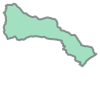

In [11]:
df.iloc[0].geometry

<AxesSubplot: >

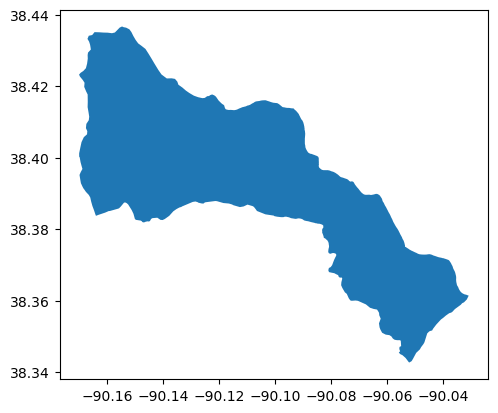

In [4]:
df.plot()

In [6]:
import py3dep

In [18]:
dem = py3dep.get_map("DEM", df.iloc[0].geometry, resolution=10)

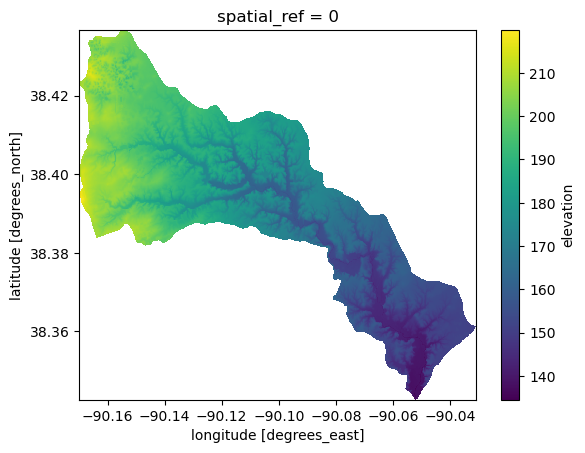

In [19]:
dem.plot()